In [13]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from urllib.request import urlopen

# Load data from the URL
url = "https://dracopd.users.ecs.westminster.ac.uk/DOCUM/courses/6elen018w/all_training_data.txt"
data = urlopen(url).read().decode('utf-8').split('\n')

# Extract input features (x, y, xG, yG) and target labels (actions)
X = []
y = []

for line in data:
    if line:
        x = int(line[1])
        y_val = int(line[4])
        gx = int(line[7])
        gy = int(line[10])
        a = int(line[16])

        features = [x, y_val, gx, gy]
        X.append(features)
        y.append(a)

# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

# Instantiate MLPRegressor
nn = MLPRegressor(
  activation='relu',
  hidden_layer_sizes=(50,30),
  alpha=0.1,
  max_iter = 10000,
  random_state=40,
  early_stopping=False
)
'''
nn = MLPRegressor(
  activation='relu',
  hidden_layer_sizes=(50,), ## For comparison 
  alpha=0.1,
  max_iter = 10000,
  random_state=40,
  early_stopping=False
)
'''
# Train the model
nn.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = nn.score(X_test, y_test)
print(f"Accuracy on the testing set: {accuracy*100}") #Times 100 to easier see the %

# Now you can use the trained model to make predictions for new input vectors
# For example, if you have a new input vector new_input = np.array([[1, 2, 1, 1]]), you can predict the action as follows:
# predicted_action = mlp.predict(new_input)
# print(f"Predicted action: {predicted_action}")

Accuracy on the testing set: 75.19641112099623


R_squared value:  0.5274756620377162
RMSE:  0.7425364263118499
Accuracy on the testing set: 52.747566203771626


/Users/anatol/Desktop/RoboticsCW/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


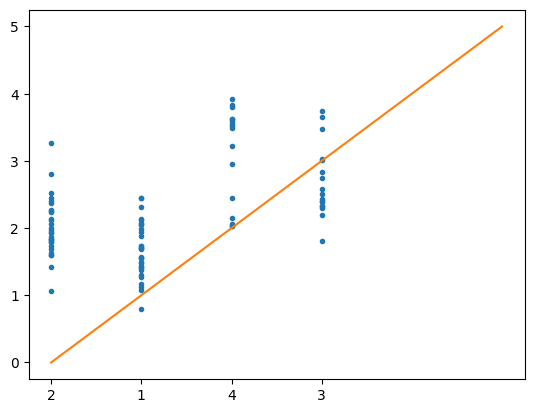

Predicted action: [1.81457365]


/Users/anatol/Desktop/RoboticsCW/venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


In [17]:
import requests
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

url = "https://dracopd.users.ecs.westminster.ac.uk/DOCUM/courses/6elen018w/all_training_data.txt"
Data_frame =pd.DataFrame(columns=['X','Y','Goal_X','Goal_Y','Action'])


# Make a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
# Get the content of the file
  file_content = response.text

  # Now you can process the content of the file as needed
  lines = file_content.splitlines()
    

  # Print the first line (index 0) - change the index as needed
  for line in lines:
      char_array = list(line)
      x = char_array[1]
      y = char_array[4]
      gx = char_array[7]
      gy = char_array[10]
      a = char_array[16]

      new_data = {
          'X' : [x],
          'Y' : [y],
          'Goal_X' : [gx],
          'Goal_Y' : [gy],
          'Action' : [a]
      }
      new_data_df = pd.DataFrame(new_data)
      Data_frame = pd.concat([Data_frame, new_data_df], ignore_index=True)

  target_df = Data_frame['Action']
  data_df = Data_frame[['X', 'Y', 'Goal_X', 'Goal_Y']]

  X_train, X_test, y_train, \
      y_test = train_test_split(data_df, target_df, test_size=0.2, random_state=40)

  # Instantiate MLPRegressor
  nn = MLPRegressor(
    activation='relu',
    hidden_layer_sizes=(50,30),
    alpha=0.1,
    max_iter = 10000,
    random_state=40,
    early_stopping=False
  )
  # Train the model
  nn.fit(X_train, y_train)

  # Make prediction
  pred = nn.predict(X_test)

  # Calculate accuracy and error metrics
  test_set_rsquared = nn.score(X_test, y_test)
  test_set_rmse = np.sqrt(mean_squared_error(y_test, pred))

  # Print R_squared and RMSE value
  print('R_squared value: ', test_set_rsquared)
  print('RMSE: ', test_set_rmse)

  # Predict unknown data
  y_pred = nn.predict(X_test)

  accuracy = nn.score(X_test, y_test)
  print(f"Accuracy on the testing set: {accuracy*100}")

  # plot prediction and actual data
  plt.plot(y_test, y_pred, '.')

  # plot a line, a perfit predict would all fall on this line
  x = np.linspace(0, 5, 2)
  y = x
  plt.plot(x, y)
  plt.show()

predicted_action = nn.predict([[4,2,2,4]])
print(f"Predicted action: {predicted_action}")


R_squared value:  0.9032258064516129
RMSE:  0.7108982656372299


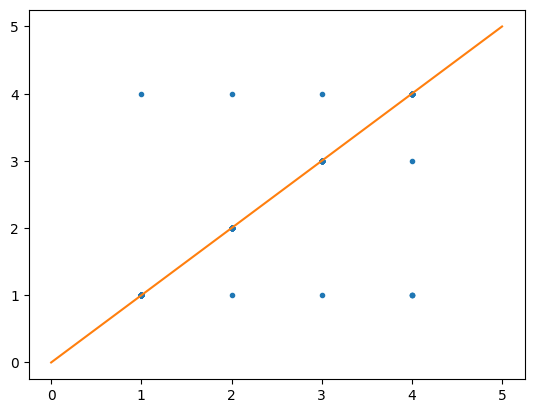

Accuracy on the testing set: 90.32258064516128


In [3]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from urllib.request import urlopen
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load data from the URL
url = "https://dracopd.users.ecs.westminster.ac.uk/DOCUM/courses/6elen018w/all_training_data.txt"
data = urlopen(url).read().decode('utf-8').split('\n')

# Extract input features (x, y, xG, yG) and target labels (actions)
X = []
y = []

for line in data:
    if line:
        # Assuming the structure of each line is fixed, you can use indices to extract values
        x = int(line[1])
        y_val = int(line[4])
        gx = int(line[7])
        gy = int(line[10])
        a = int(line[16])

        features = [x, y_val, gx, gy]
        X.append(features)
        y.append(a)

# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10000, random_state=42)
mlp.fit(X_train, y_train)

# Make prediction
pred = mlp.predict(X_test)

# Calculate accuracy and error metrics
test_set_rsquared = mlp.score(X_test, y_test)
test_set_rmse = np.sqrt(mean_squared_error(y_test, pred))

# Print R_squared and RMSE value
print('R_squared value: ', test_set_rsquared)
print('RMSE: ', test_set_rmse)

# plot prediction and actual data
plt.plot(y_test, pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 5, 2)
y = x
plt.plot(x, y)
plt.show()

# Evaluate the model on the testing set
accuracy = mlp.score(X_test, y_test)
print(f"Accuracy on the testing set: {accuracy*100}")

# Now you can use the trained model to make predictions for new input vectors
# For example, if you have a new input vector new_input = np.array([[1, 2, 1, 1]]), you can predict the action as follows:
# predicted_action = mlp.predict(new_input)
# print(f"Predicted action: {predicted_action}")



In [4]:
predicted_action = mlp.predict([[4,2,2,4]])
rounded_action = np.round(predicted_action)
print(f"Predicted action: {rounded_action}")

Predicted action: [1]


In [11]:
import time
import numpy as np
from concurrent.futures import wait

def num2Action(action):
    global s_new, s
    if action == 1:
        s_new[0] = s[0] - 1
        print('UP')
    elif action == 2:
        s_new[1] = s[1] + 1
        print('RIGHT')
    elif action == 3:
        s_new[0] = s[0] + 1
        print('DOWN')
    else:
        s_new[1] = s[1] - 1
        print('LEFT')

s = [4, 2, 2, 4]
maze = [[0, 0, 0, 0, 0],
        [0, 1, 0, 'G', 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]]
Past_S = [0, 0]
s_new = [4, 2]

for row in maze:
    print(row)
    
while True:
    print('\nS = ', s)
    maze[s[0]-1][s[1]-1] = 'x'
    if Past_S != [0, 0]:
        maze[Past_S[0]-1][Past_S[1]-1] = 0
    #Showing the current state of the matrix 
    for row in maze:
        print(row) 
        
    a = np.round(nn.predict([[s[0], s[1], 2, 4]])[0])
    num2Action(a)
    print(a)
    
    #time.sleep(3)
    try:
        if maze[s_new[0]-1][s_new[1]-1] == 1 or maze[s_new[0]-1][s_new[1]-1] == 'x':
            s_new[0] = s[0]
            s_new[1] = s[1]
            print('Obstacle hit')
        elif maze[s_new[0]-1][s_new[1]-1] == 'G':
            print('Goal reached!!')
            break
        else:
            Past_S = s.copy()
            s[1] = s_new[1]
            s[0] = s_new[0]
        
    except IndexError as e:
        print(f"Warning: {e}. Skipping the current iteration.")
    
    
    


[0, 0, 0, 0, 0]
[0, 1, 0, 'G', 0]
[0, 0, 1, 0, 0]
[0, 0, 0, 1, 0]
[0, 0, 0, 0, 0]

S =  [4, 2, 2, 4]
[0, 0, 0, 0, 0]
[0, 1, 0, 'G', 0]
[0, 0, 1, 0, 0]
[0, 'x', 0, 1, 0]
[0, 0, 0, 0, 0]
UP
1.0

S =  [3, 2, 2, 4]
[0, 0, 0, 0, 0]
[0, 1, 0, 'G', 0]
[0, 'x', 1, 0, 0]
[0, 0, 0, 1, 0]
[0, 0, 0, 0, 0]
LEFT
4.0

S =  [3, 1, 2, 4]
[0, 0, 0, 0, 0]
[0, 1, 0, 'G', 0]
['x', 0, 1, 0, 0]
[0, 0, 0, 1, 0]
[0, 0, 0, 0, 0]
UP
1.0

S =  [2, 1, 2, 4]
[0, 0, 0, 0, 0]
['x', 1, 0, 'G', 0]
[0, 0, 1, 0, 0]
[0, 0, 0, 1, 0]
[0, 0, 0, 0, 0]
UP
1.0

S =  [1, 1, 2, 4]
['x', 0, 0, 0, 0]
[0, 1, 0, 'G', 0]
[0, 0, 1, 0, 0]
[0, 0, 0, 1, 0]
[0, 0, 0, 0, 0]
RIGHT
2.0

S =  [1, 2, 2, 4]
[0, 'x', 0, 0, 0]
[0, 1, 0, 'G', 0]
[0, 0, 1, 0, 0]
[0, 0, 0, 1, 0]
[0, 0, 0, 0, 0]
RIGHT
2.0

S =  [1, 3, 2, 4]
[0, 0, 'x', 0, 0]
[0, 1, 0, 'G', 0]
[0, 0, 1, 0, 0]
[0, 0, 0, 1, 0]
[0, 0, 0, 0, 0]
RIGHT
2.0

S =  [1, 4, 2, 4]
[0, 0, 0, 'x', 0]
[0, 1, 0, 'G', 0]
[0, 0, 1, 0, 0]
[0, 0, 0, 1, 0]
[0, 0, 0, 0, 0]
DOWN
3.0
Goal reached!!


/Users/anatol/Desktop/RoboticsCW/venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/anatol/Desktop/RoboticsCW/venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/anatol/Desktop/RoboticsCW/venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/anatol/Desktop/RoboticsCW/venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/anatol/Desktop/RoboticsCW/venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warni